## Experiment 4
---
Building an Artificial Neural Network from scratch.


Some explanation:  

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [3]:
data = pd.read_csv('./data/train-4.csv')

In [4]:
data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There's always a fear of overfitting the data, i.e., your model works great with training dataset, but doesn't generalise it. From the training dataset, we set aside a portion of it as a dataset cross-validation, so as to not overfit the data.

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Keeping aside images 0-999
devData = data[:1000].T

# Since the first row of the array devData is just the labels, we set them as the Y values.
Y_dev = devData[0]
X_dev = devData[1:n]

# We divide by 255 to fit the data in the range [0, 1]
X_dev = X_dev / 255

# The rest of the 1000 to m-1 images :)
trainingData = data[1000:m].T

# Similarly, the first row of the array trainingData is all labels, we set them as the Y values.
Y_train = trainingData[0]
X_train = trainingData[1:n]

# We divide by 255 to fit the data in the range [0, 1]
X_train = X_train / 255


In [6]:
devData

array([[8, 3, 2, ..., 5, 9, 6],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
X_dev.shape

(784, 1000)

In [8]:
X_train.shape

(784, 41000)

As we can see from the shapes, we have split the dataset into 2 datasets of 1000 and 41000 images each.

In [9]:
X_train.shape[0]

784

Each row is an image :)

In [10]:
# We want the weights of each connection to be in (-0.5, 0.5), so we subtract 0.5 from .rand().
# (.rand() returns values in (0, 1))

def initParams():
    
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

### Step 1: Forward-propagation

Taking the image, and running it through the network.

A<sup>[0]</sup> = X  
Z<sup>[1]</sup> = w<sup>[1]</sup>A<sup>[0]</sup> + b<sup>[1]</sup>[b -> bias; of the form mx + c; ]  
###### Dim <sup>10 x m  10 x 784  784 x m     10 x 1</sup>
  
A<sup>[1]</sup> = g(Z<sup>[1]</sup>) = ReLU (Z<sup>[1]</sup>) [ReLU -> activation function -> Rectified Linear Unit]

w -> each of the corresponding connections between input and hidden layers.  

```py
def ReLU(x):
    if x > 0:
        x = x
    else:
        x = 0
```

Now for the output layer [2]:  
Z<sup>[2]</sup> = w<sup>[2]</sup>A<sup>[1]</sup>  + b<sup>[2]</sup>  
A<sup>[2]</sup> = softmax(Z<sup>[2]</sup>)  


In [11]:
def ReLU(x):
    return np.maximum(0, x)


#### Softmax function  
Used to get probability values from real numbers, converting it into a probability distribution, i.e all the probabilities summed will equal to 1.  
The number of output nodes should always be equal to the number of classes, so that each class can hold a probability value,
It is only used in the output layer of the network.

\begin {equation}
softmax\left(y_{i} \right) = \frac{e ^ {y_{i}}}{\sum _{k} e ^ {y_{k}}}
\end {equation}


In [12]:
def softmax(A):
    
    Z = np.exp(A) / sum(np.exp(A))
    return Z

In [13]:

def forwardProp(W1, b1, W2, b2, X):
    
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2


In [14]:
# When you convert booleans to numbers, True becomes 1 and False becomes 0.
# This works, because the ReLU function is a line for x > 0, however 0 for x < 0.
# The derivative of the ReLU function will always either be 0 or 1, as the rate of change is either linear or 0.

def derivReLU(A):
    
    return A > 0

In [15]:

def oneHot(Y):
    
    # One hot encodes the data, where each row is an image
    df = pd.get_dummies(Y)
    
    # Converting dataframe to array
    encodedArray = np.array(df)
    
    # Taking the transpose, so that each column is the one hot encoded classification of the image
    encodedArray = encodedArray.T
    
    return encodedArray

### Step 2: Back-propagation

Here we'll create a prediction, and see how much it differs from the actual label, giving us an error.  
Using this error, we can see how much each weight and bias contributed to that error,  
dZ<sup>[2]</sup> = A<sup>[2]</sup> - Y  

Where Y is the one hot encoded target for m images, resulting in a dim of 10 x m for the matrix; where the one hot encoded target is in each column for m images.  

To find the contribution of weights to the prediction:

dw<sup>[2]</sup> = (1/m)dZ<sup>[2]</sup> A<sup>[2]T</sup>


To find the contribution of bias to the prediction:

\begin {equation}
db^{[2]} = \frac{1}{m} dz^{[2]}A^{[1]T}
\end {equation}

In [16]:
def backProp(Z1, A1, Z2, A2, W2, X, Y):
    
    m = Y.size
    
    encodedY = oneHot(Y)
    
    dZ2 = A2 - encodedY
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derivReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db1


Updates the Parameters according to the slopes of the functions. (Gradient Descent updation)

In [17]:
def updateParams(W1, b1, W2, b2, dW1, dB1, dW2, db2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * dB1
    
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

In [18]:
def getPredictions(A2):
    return np.argmax(A2, 0)

def getAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum (predictions == Y) / Y.size

Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

In [19]:
def gradientDescent(X, Y, epochs, alpha):
    W1, b1, W2, b2 = initParams()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forwardProp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backProp(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i + 1) % 10 == 0:
            print("Epoch -> {}!".format(i+1))
            predictions = getPredictions(A2)
            print(getAccuracy(predictions, Y))
    return W1, b1, W2, b2


In [20]:
W1, b1, W2, b2 = gradientDescent(X_train, Y_train, 1000, 0.4)

Epoch -> 10!
[0 3 0 ... 0 4 1] [4 8 0 ... 3 8 1]
0.25041463414634146
Epoch -> 20!
[9 3 0 ... 0 3 1] [4 8 0 ... 3 8 1]
0.32926829268292684
Epoch -> 30!
[9 3 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.481390243902439
Epoch -> 40!
[9 3 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.6162682926829268
Epoch -> 50!
[9 5 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.6400731707317073
Epoch -> 60!
[4 5 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.6662926829268293
Epoch -> 70!
[4 5 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.698390243902439
Epoch -> 80!
[4 8 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.7348292682926829
Epoch -> 90!
[4 8 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.7610243902439024
Epoch -> 100!
[4 8 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.7833658536585366
Epoch -> 110!
[4 8 0 ... 0 8 1] [4 8 0 ... 3 8 1]
0.7992439024390244
Epoch -> 120!
[4 8 0 ... 3 8 1] [4 8 0 ... 3 8 1]
0.8112682926829269
Epoch -> 130!
[4 8 0 ... 3 8 1] [4 8 0 ... 3 8 1]
0.8215121951219512
Epoch -> 140!
[4 8 0 ... 3 8 1] [4 8 0 ... 3 8 1]
0.8294878048780487
Epoch -> 150!
[4 8 0 ... 3 8 1] [4 8 0 ... 

In [21]:
def makePredictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardProp(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    return predictions


def testPrediction(index, W1, b1, W2, b2):
    
    # Slices a singular column at position index. Need to figure out what None means here.
    # If not using None, it returns the predictions in the 
    current_image = X_train[:, index, None]
    prediction = makePredictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Index: ", index )
    print("Prediction: ", prediction)
    print("Label: ", label)

    # We multiply the data by 255 to bring it back in the range [0, 255]
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Index:  23360
Prediction:  [6]
Label:  6


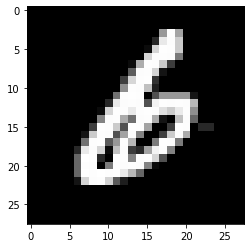

Index:  23361
Prediction:  [9]
Label:  3


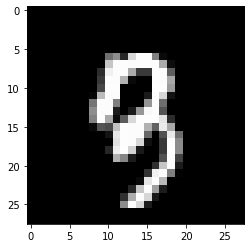

In [54]:
n = 2

idx1 = random.randint(0, (41000 - n))

for i in range(n):
    testPrediction(idx1 + i, W1, b1, W2, b2)

In [23]:
devPredictions = makePredictions(X_dev, W1, b1, W2, b2)
getAccuracy(devPredictions, Y_dev)

[8 3 5 9 7 9 6 1 8 4 6 8 1 2 8 3 0 8 2 3 2 3 1 0 4 3 1 8 7 1 7 0 2 4 7 8 1
 6 4 7 3 6 5 3 5 1 7 1 4 7 1 0 9 2 3 8 0 2 0 3 9 6 2 0 8 4 8 6 2 2 4 4 9 8
 5 2 4 4 6 2 1 4 0 4 3 4 9 7 9 8 5 1 6 5 8 6 9 0 5 6 6 0 1 4 9 8 4 7 8 0 4
 8 7 7 4 9 4 8 3 2 7 8 0 9 5 0 2 8 9 7 5 6 8 5 1 1 9 9 3 9 6 8 2 0 2 2 3 9
 0 3 1 2 0 6 5 3 7 0 5 9 0 3 6 5 5 1 0 2 1 7 7 9 7 4 5 5 1 6 4 6 0 3 8 2 4
 9 9 9 1 8 3 1 0 6 4 3 5 4 2 2 0 1 1 4 9 2 0 4 4 6 4 3 4 3 9 6 1 1 0 0 1 2
 1 2 8 1 1 1 8 3 0 4 7 6 8 0 2 4 7 2 6 9 7 9 1 4 9 1 8 2 2 5 0 8 5 4 1 0 8
 4 3 1 8 5 8 3 9 1 7 3 3 4 3 6 4 4 4 7 9 1 1 8 0 7 8 6 3 4 3 1 7 8 0 3 1 1
 1 4 4 4 5 5 0 9 1 7 7 3 6 9 1 8 5 5 8 2 5 4 3 7 1 9 0 3 6 2 2 2 9 2 1 9 6
 4 9 4 9 8 2 7 2 1 7 0 9 6 1 5 6 5 0 7 4 2 0 3 3 6 8 3 7 2 7 8 9 0 3 7 0 4
 2 1 2 8 6 3 9 2 0 9 8 8 0 5 1 5 8 3 9 1 5 8 3 8 0 4 1 3 0 3 3 3 1 7 5 0 2
 7 1 1 5 3 6 9 8 8 7 7 8 6 3 5 4 8 2 5 1 1 2 9 1 4 4 8 9 9 5 8 6 9 8 5 6 0
 9 2 7 9 3 8 5 9 8 4 8 0 9 7 8 0 4 4 9 4 6 9 4 8 6 8 6 4 2 8 5 7 0 9 1 0 8
 1 8 8 5 1 1 4 5 9 3 1 1 

0.91